In [1]:
pip install gdown pandas scikit-learn matplotlib


In [2]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [3]:
url = 'https://drive.google.com/uc?id=1wOrVrq30W3bl1st4cvnt5bvn5UWEK4Ab'
output = 'Social_Network_Ads.csv'
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1wOrVrq30W3bl1st4cvnt5bvn5UWEK4Ab
To: C:\Users\User\Social_Network_Ads.csv
100%|██████████| 4.90k/4.90k [00:00<00:00, 697kB/s]


'Social_Network_Ads.csv'

In [5]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Social_Network_Ads.csv')

# Display the first few rows of the dataset
print(data.head())

# Check the dataset information
print(data.info())


   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB
None


In [6]:
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}


In [8]:
results = {}

for name, clf in classifiers.items():
    # Train model
    clf.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = clf.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
    
    # Print classification report
    print(f"--- {name} ---")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print()


--- Logistic Regression ---
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        73
           1       0.94      0.66      0.78        47

    accuracy                           0.85       120
   macro avg       0.88      0.82      0.83       120
weighted avg       0.86      0.85      0.84       120

Confusion Matrix:
[[71  2]
 [16 31]]

--- K-Nearest Neighbors ---
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        73
           1       0.91      0.91      0.91        47

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120

Confusion Matrix:
[[69  4]
 [ 4 43]]

--- Support Vector Machine ---
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        73
     

Results Comparison:
                        Accuracy  Precision    Recall  F1 Score
Logistic Regression     0.850000   0.939394  0.659574  0.775000
K-Nearest Neighbors     0.933333   0.914894  0.914894  0.914894
Support Vector Machine  0.941667   0.900000  0.957447  0.927835
Decision Tree           0.841667   0.818182  0.765957  0.791209
Random Forest           0.891667   0.869565  0.851064  0.860215


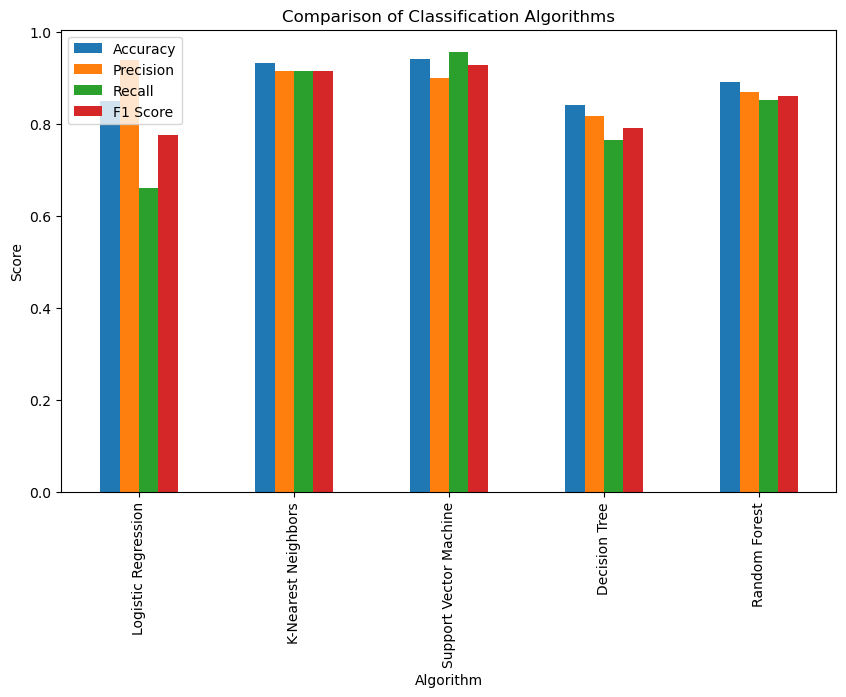

In [9]:
results_df = pd.DataFrame(results).T
print("Results Comparison:")
print(results_df)

# Visualization
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.show()


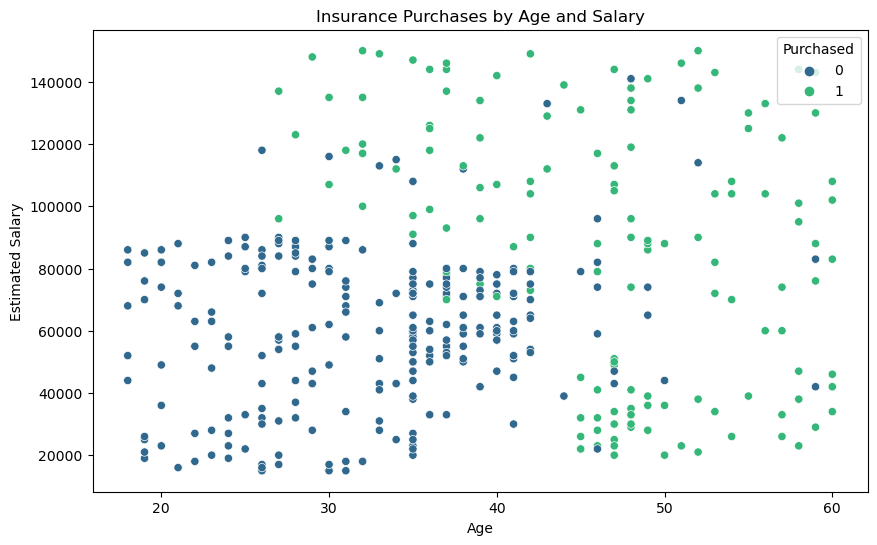

In [10]:
import seaborn as sns

# Plot scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='EstimatedSalary', hue='Purchased', palette='viridis')
plt.title('Insurance Purchases by Age and Salary')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend(title='Purchased', loc='upper right')
plt.show()


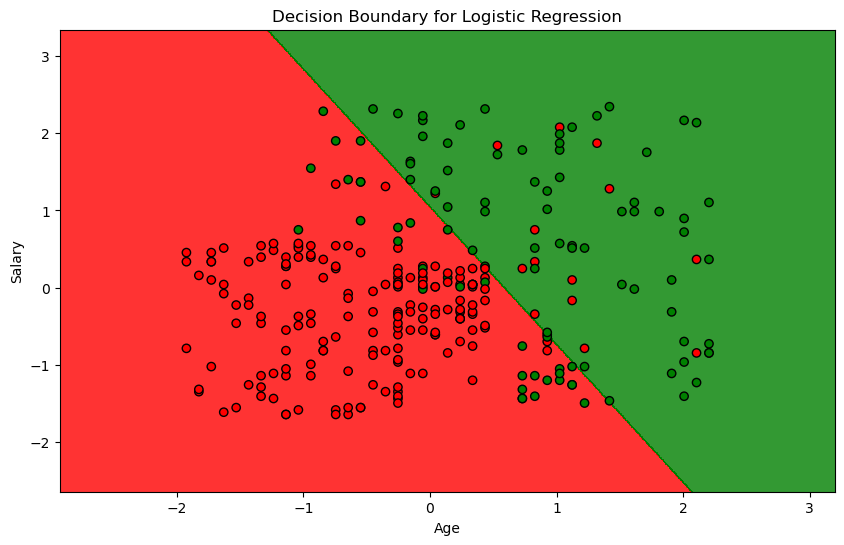

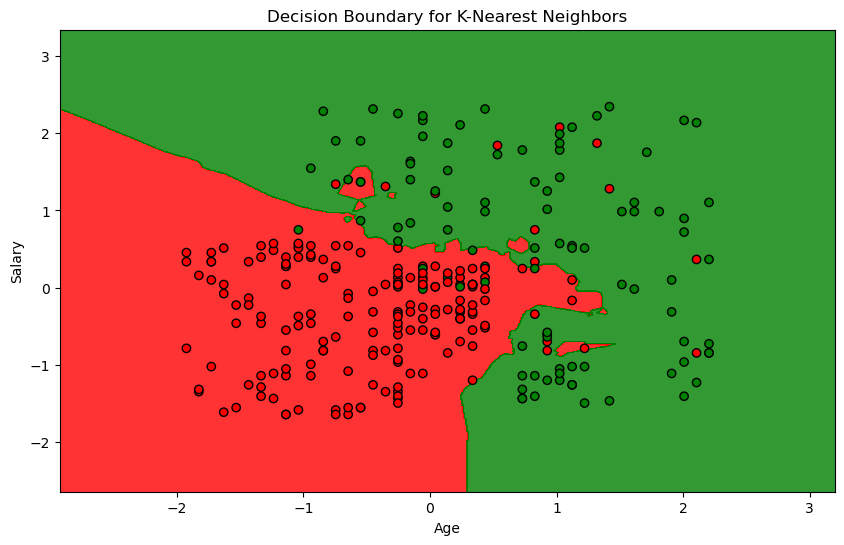

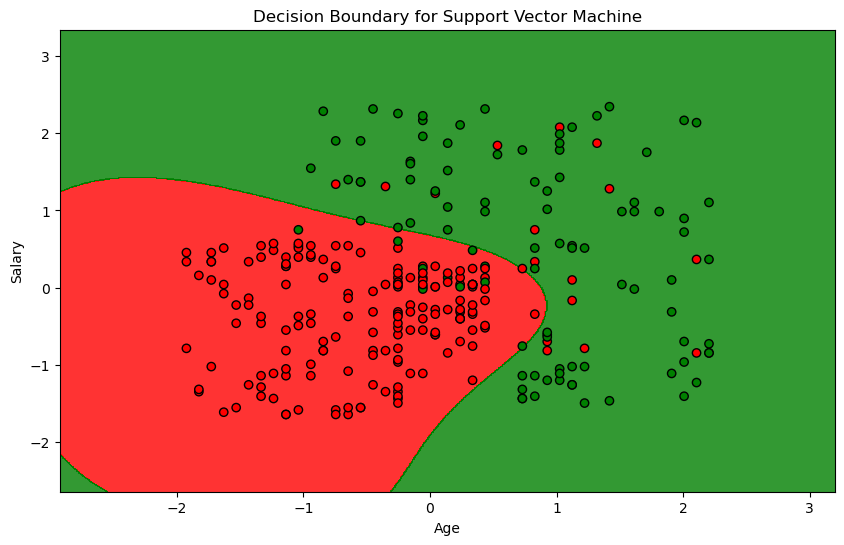

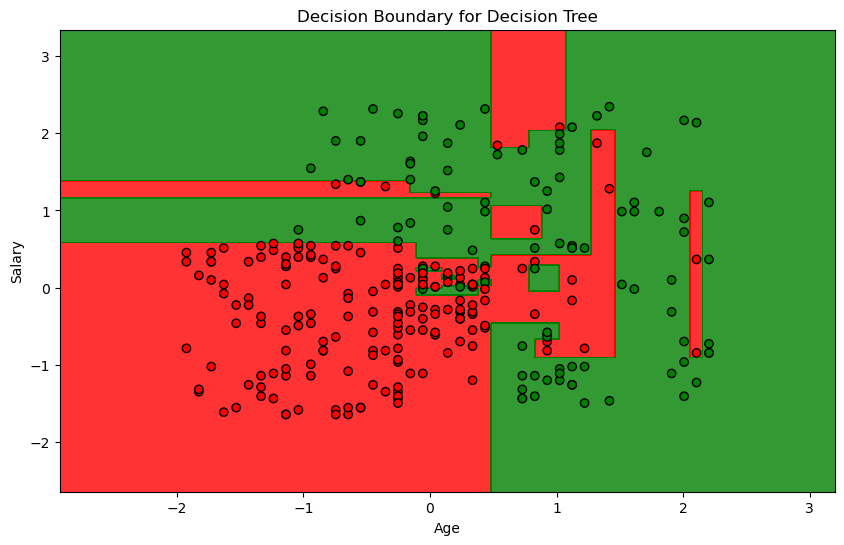

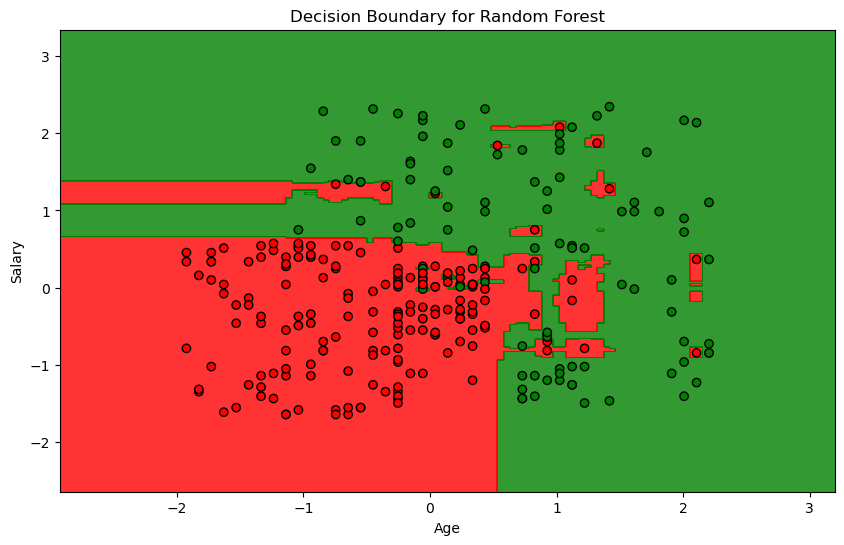

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, title):
    # Define the grid over which we will plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict the classification for each point in the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['red', 'green']))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['red', 'green']))
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Salary')
    plt.show()

# Example usage (assuming `classifiers`, `X_train`, and `y_train` are defined):
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    plot_decision_boundary(clf, X_train, y_train, f'Decision Boundary for {name}')


In [18]:
import pandas as pd
import numpy as np

# Define your datasets
data1 = pd.DataFrame({
    'Age': [30, 40, 40, 50],
    'Salary': [87000, np.nan, 100000, np.nan],
    'Purchased': [1, 0, 1, 0]  # Example target values
})

data2 = pd.DataFrame({
    'Age': [18, 22, 35, 60],
    'Salary': [np.nan, 600000, 2500000, 100000000],
    'Purchased': [1, 1, 1, 0]  # Example target values
})

# Fill missing salary values with the mean of non-missing values for simplicity
data1['Salary'].fillna(data1['Salary'].mean(), inplace=True)
data2['Salary'].fillna(data2['Salary'].mean(), inplace=True)

# Extract features and target
X1 = data1[['Age', 'Salary']].values
y1 = data1['Purchased'].values

X2 = data2[['Age', 'Salary']].values
y2 = data2['Purchased'].values


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(kernel='linear')
}

# Split data into training and testing sets
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Train classifiers on each dataset
trained_classifiers1 = {name: clf.fit(X_train1, y_train1) for name, clf in classifiers.items()}
trained_classifiers2 = {name: clf.fit(X_train2, y_train2) for name, clf in classifiers.items()}


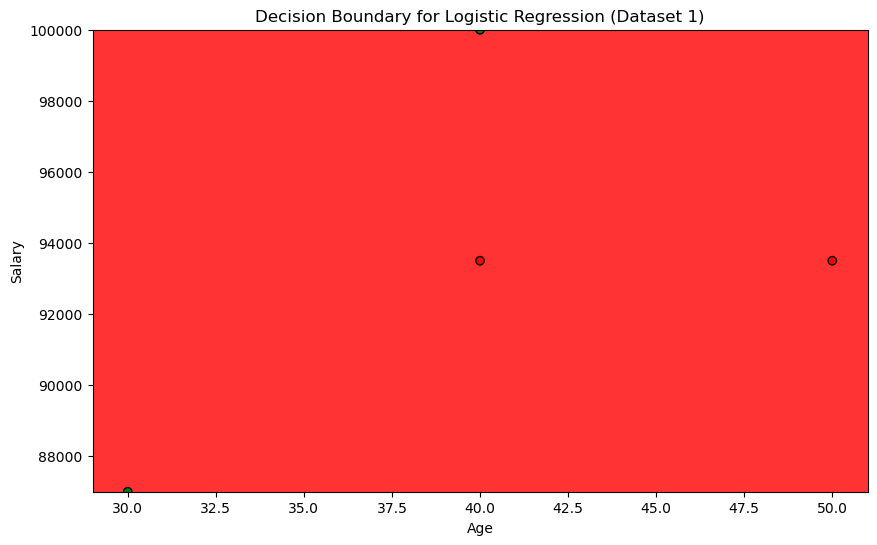

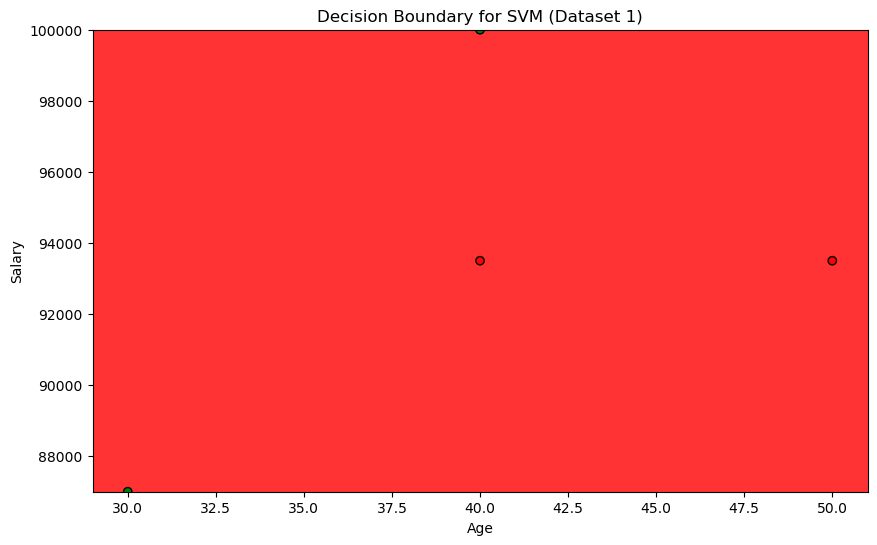

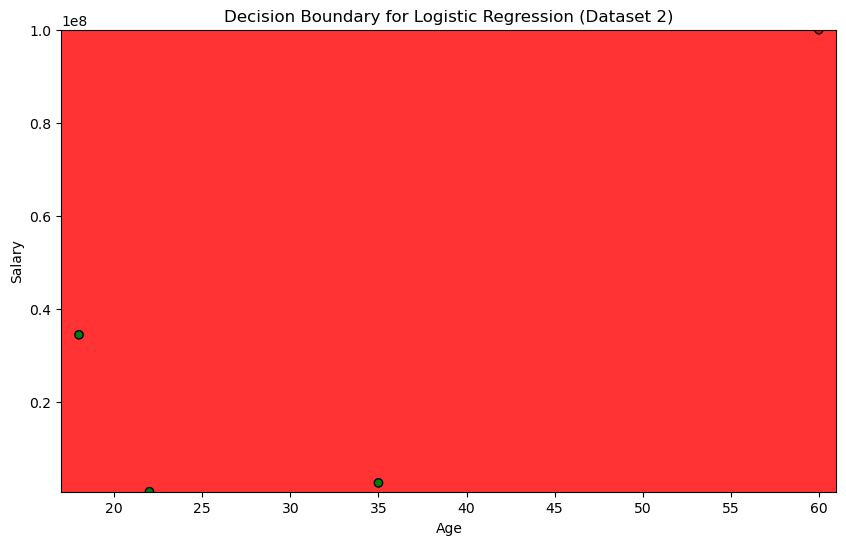

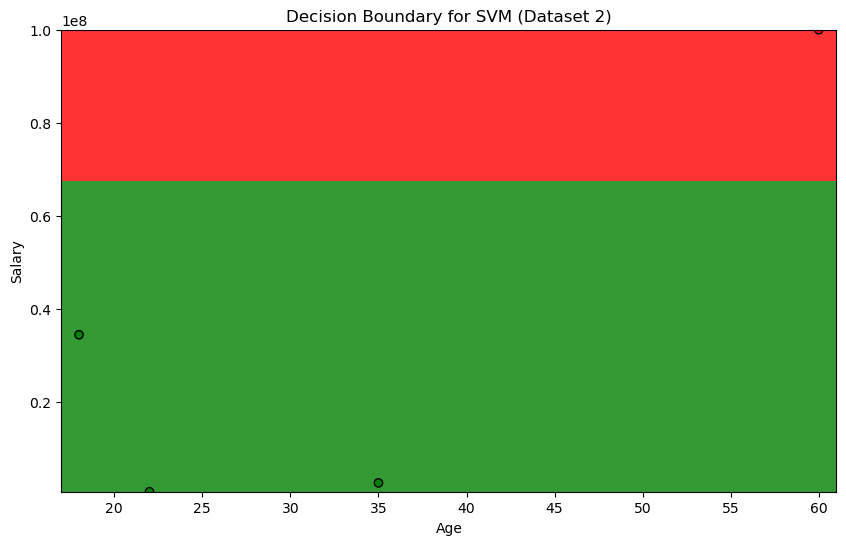

In [28]:
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Use np.linspace to create a coarser grid
    xx, yy = np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100)
    xx, yy = np.meshgrid(xx, yy)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['red', 'green']))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['red', 'green']))
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Salary')
    plt.show()

# Plot decision boundaries for the first dataset
for name, clf in trained_classifiers1.items():
    plot_decision_boundary(clf, X1, y1, f'Decision Boundary for {name} (Dataset 1)')

# Plot decision boundaries for the second dataset
for name, clf in trained_classifiers2.items():
    plot_decision_boundary(clf, X2, y2, f'Decision Boundary for {name} (Dataset 2)')


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Example classifier

# Example dataset (replace with your data)
X = np.array([[25, 50000], [30, 70000], [40, 120000], [50, 150000], [35, 100000], [45, 200000], [55, 250000]])
y = np.array([1, 1, 0, 0, 1, 1, 0])  # 1 = Purchased, 0 = Not Purchased

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

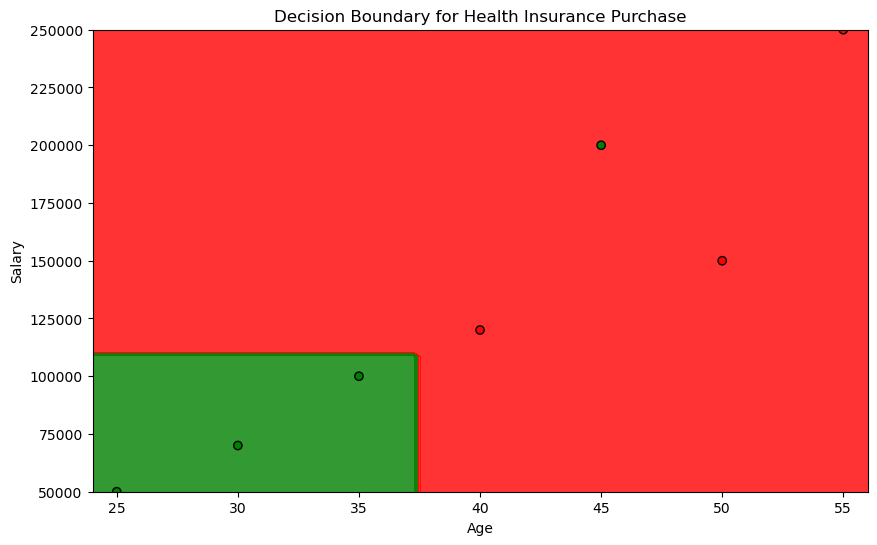

In [33]:
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['red', 'green']))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['red', 'green']))
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Salary')
    plt.show()

# Plot decision boundary
plot_decision_boundary(clf, X, y, 'Decision Boundary for Health Insurance Purchase')


In [34]:
def predict_scenario(clf, age, salary):
    return clf.predict(np.array([[age, salary]]))[0]

# New scenarios
scenarios = [(30, 87000), (40, 0), (40, 100000), (50, 0)]

print("Predictions for the given scenarios:")
for age, salary in scenarios:
    prediction = predict_scenario(clf, age, salary)
    print(f"Age: {age}, Salary: {salary} -> {'Purchased' if prediction == 1 else 'Not Purchased'}")


Predictions for the given scenarios:
Age: 30, Salary: 87000 -> Purchased
Age: 40, Salary: 0 -> Not Purchased
Age: 40, Salary: 100000 -> Not Purchased
Age: 50, Salary: 0 -> Not Purchased


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Example classifier

# Example dataset (replace with your data)
X = np.array([[25, 50000], [30, 70000], [40, 120000], [50, 150000], [35, 100000], [45, 200000], [55, 250000]])
y = np.array([1, 1, 0, 0, 1, 1, 0])  # 1 = Purchased, 0 = Not Purchased

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

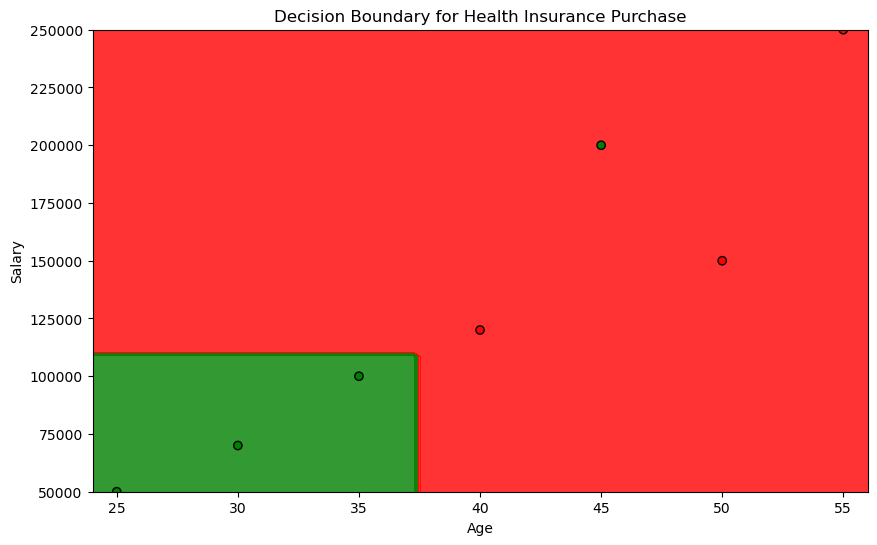

In [36]:
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['red', 'green']))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['red', 'green']))
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Salary')
    plt.show()

# Plot decision boundary
plot_decision_boundary(clf, X, y, 'Decision Boundary for Health Insurance Purchase')


In [37]:
def predict_scenario(clf, age, salary):
    return clf.predict(np.array([[age, salary]]))[0]

# New scenarios
scenarios = [(18, 0), (22, 600000), (35, 2500000), (60, 100000000)]

print("Predictions for the given scenarios:")
for age, salary in scenarios:
    prediction = predict_scenario(clf, age, salary)
    print(f"Age: {age}, Salary: {salary} -> {'Purchased' if prediction == 1 else 'Not Purchased'}")


Predictions for the given scenarios:
Age: 18, Salary: 0 -> Purchased
Age: 22, Salary: 600000 -> Not Purchased
Age: 35, Salary: 2500000 -> Not Purchased
Age: 60, Salary: 100000000 -> Not Purchased


In [38]:
# Define the age range for younger individuals
young_age_range = (20, 30)

# Generate test data for younger individuals with varying salaries
young_salaries = [50000, 100000, 150000, 200000]
predictions = {}
for salary in young_salaries:
    prediction = predict_scenario(clf, 25, salary)  # Use an age in the younger range
    predictions[salary] = 'Purchased' if prediction == 1 else 'Not Purchased'

print("Predictions for younger individuals with varying salaries:")
print(predictions)


Predictions for younger individuals with varying salaries:
{50000: 'Purchased', 100000: 'Purchased', 150000: 'Not Purchased', 200000: 'Not Purchased'}


In [39]:
# Define the age range for older individuals
older_age_range = (50, 60)

# Generate test data for older individuals with varying salaries
older_salaries = [50000, 100000, 150000, 200000]
predictions = {}
for salary in older_salaries:
    prediction = predict_scenario(clf, 55, salary)  # Use an age in the older range
    predictions[salary] = 'Purchased' if prediction == 1 else 'Not Purchased'

print("Predictions for older individuals with varying salaries:")
print(predictions)


Predictions for older individuals with varying salaries:
{50000: 'Not Purchased', 100000: 'Not Purchased', 150000: 'Not Purchased', 200000: 'Not Purchased'}


In [40]:
# Define fixed ages for testing
fixed_ages = [25, 50]

# Generate test data for varying salaries
salaries = [50000, 100000, 200000, 400000]
age_predictions = {}
salary_predictions = {}

for age in fixed_ages:
    for salary in salaries:
        age_prediction = predict_scenario(clf, age, salary)
        age_predictions[(age, salary)] = 'Purchased' if age_prediction == 1 else 'Not Purchased'

for salary in salaries:
    for age in fixed_ages:
        salary_prediction = predict_scenario(clf, age, salary)
        salary_predictions[(age, salary)] = 'Purchased' if salary_prediction == 1 else 'Not Purchased'

print("Impact of salary on purchasing behavior with fixed ages:")
print(age_predictions)

print("Impact of age on purchasing behavior with varying salaries:")
print(salary_predictions)


Impact of salary on purchasing behavior with fixed ages:
{(25, 50000): 'Purchased', (25, 100000): 'Purchased', (25, 200000): 'Not Purchased', (25, 400000): 'Not Purchased', (50, 50000): 'Not Purchased', (50, 100000): 'Not Purchased', (50, 200000): 'Not Purchased', (50, 400000): 'Not Purchased'}
Impact of age on purchasing behavior with varying salaries:
{(25, 50000): 'Purchased', (50, 50000): 'Not Purchased', (25, 100000): 'Purchased', (50, 100000): 'Not Purchased', (25, 200000): 'Not Purchased', (50, 200000): 'Not Purchased', (25, 400000): 'Not Purchased', (50, 400000): 'Not Purchased'}


Model Accuracy: 0.50


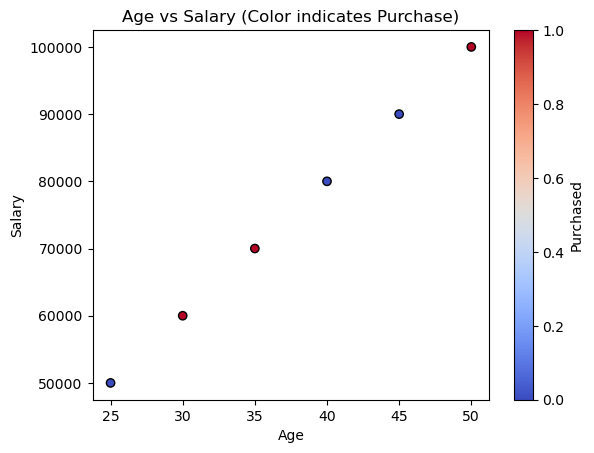

Predictions for new data:
Age: 30, Salary: 87000.0, Purchased: No
Age: 40, Salary: 75000.0, Purchased: No
Age: 40, Salary: 100000.0, Purchased: No
Age: 50, Salary: 75000.0, Purchased: No
Age: 18, Salary: 75000.0, Purchased: No
Age: 22, Salary: 600000.0, Purchased: No
Age: 35, Salary: 2500000.0, Purchased: No
Age: 60, Salary: 100000000.0, Purchased: No


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


data = pd.DataFrame({
    'Age': [25, 30, 35, 40, 45, 50],
    'Salary': [50000, 60000, 70000, 80000, 90000, 100000],
    'Purchased': [0, 1, 1, 0, 0, 1]  # 0: No, 1: Yes
})

# Handling missing values by imputing (e.g., filling with mean)
data['Salary'].fillna(data['Salary'].mean(), inplace=True)

# Features and target variable
X = data[['Age', 'Salary']]
y = data['Purchased']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Accuracy
print(f"Model Accuracy: {accuracy_score(y_test, predictions):.2f}")

# Predictions for new data
new_data = pd.DataFrame({
    'Age': [30, 40, 40, 50, 18, 22, 35, 60],
    'Salary': [87000, np.nan, 100000, np.nan, np.nan, 600000, 2500000, 100000000]
})
new_data['Salary'].fillna(data['Salary'].mean(), inplace=True)
new_data_scaled = scaler.transform(new_data)
new_predictions = model.predict(new_data_scaled)

# Plotting
plt.scatter(data['Age'], data['Salary'], c=y, cmap='coolwarm', edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary (Color indicates Purchase)')
plt.colorbar(label='Purchased')
plt.show()

# Output predictions
print("Predictions for new data:")
for age, salary, pred in zip(new_data['Age'], new_data['Salary'], new_predictions):
    print(f"Age: {age}, Salary: {salary}, Purchased: {'Yes' if pred == 1 else 'No'}")


In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Sample historical data
data = {
    'Age': [25, 45, 30, 50, 35, 60, 22, 40, 28, 55],
    'Salary': [50000, 800000, 200000, 1500000, 300000, 2500000, 600000, 1200000, 70000, 900000],
    'Purchased Insurance': [1, 0, 1, 0, 1, 0, 1, 1, 1, 0]
}

df = pd.DataFrame(data)

# Features and target
X = df[['Age', 'Salary']]
y = df['Purchased Insurance']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the model
model = make_pipeline(StandardScaler(), LogisticRegression())
model.fit(X_train, y_train)

# Predictions on test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Test scenarios
new_data = pd.DataFrame({
    'Age': [18, 22, 35, 60],
    'Salary': [0, 600000, 2500000, 100000000]
})

predictions = model.predict(new_data)
print("Predictions for new scenarios:")
print(predictions)



Model Accuracy: 0.6666666666666666
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3

Predictions for new scenarios:
[1 1 0 0]
